In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Reading the csv file

In [70]:
df=pd.read_csv('stud.csv')

In [71]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# information of the df

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


we can conclude that there are no null values

# describing the data

In [73]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [74]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# explaning data

In [75]:
print("how many categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())
print()
print('*'*70)
print()
print("how many categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race_ethnicity'].unique())
print()
print('*'*70)
print()
print("how many categories in 'parental level of education' variable:    ",end=" ")
print(df['parental_level_of_education'].unique())
print()
print('*'*70)
print()
print("how many categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())
print()
print('*'*70)
print()
print("how many categories in 'test preparation course' variable:    ",end=" ")
print(df['test_preparation_course'].unique())


how many categories in 'gender' variable:     ['female' 'male']

**********************************************************************

how many categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']

**********************************************************************

how many categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

**********************************************************************

how many categories in 'lunch' variable:     ['standard' 'free/reduced']

**********************************************************************

how many categories in 'test preparation course' variable:     ['none' 'completed']


In [76]:
#define numerical ^ categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# feature construction (total score, avg score)

In [77]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=df['total_score']/3

this new features will become our new dependent/y feature

In [78]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Data visualization

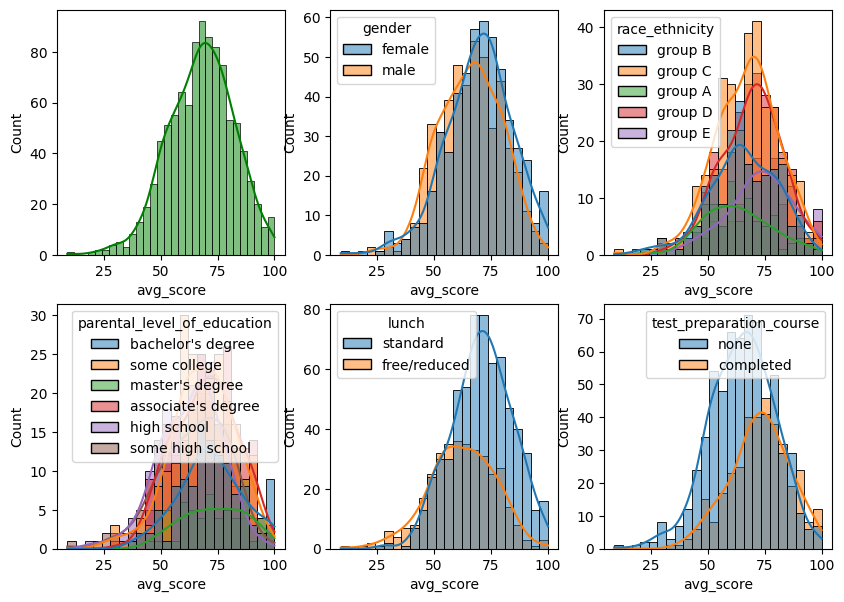

In [79]:
fig,axis=plt.subplots(2,3,figsize=(10,7))
plt.subplot(231)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(232)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.subplot(233)
sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(234)
sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(235)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(236)
sns.histplot(data=df,x='avg_score',kde=True,hue='test_preparation_course')
plt.show()

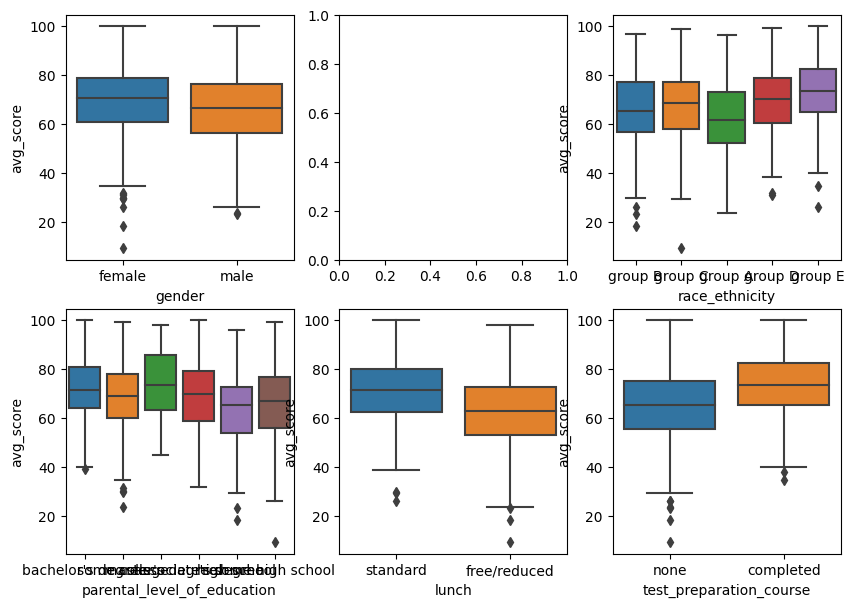

In [80]:
fig,axis=plt.subplots(2,3,figsize=(10,7))
plt.subplot(231)
sns.boxplot(data=df,y='avg_score',x='gender')
plt.subplot(233)
sns.boxplot(data=df,y='avg_score',x='race_ethnicity')
plt.subplot(234)
sns.boxplot(data=df,y='avg_score',x='parental_level_of_education')
plt.subplot(235)
sns.boxplot(data=df,y='avg_score',x='lunch')
plt.subplot(236)
sns.boxplot(data=df,y='avg_score',x='test_preparation_course')
plt.show()

# insight:

-> as we can see all the independent features have normal destribution with acords to avg_score

-> from the boxplots we can say that the means for the categories varies.So, we can conclude that there is a significant differnece in there variable values and we can use this feature for imporving accuracy

# univarient analysis

In [81]:
from scipy import stats

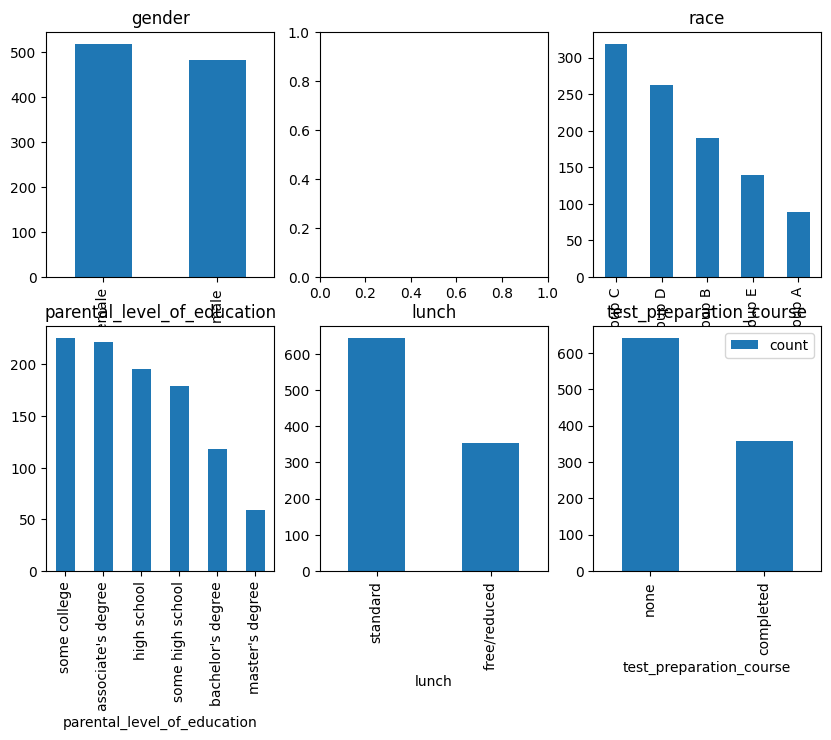

In [94]:
fig,axs=plt.subplots(2,3,figsize=(10,7))
plt.subplot(231)
plt.title('gender')
df['gender'].value_counts().plot(kind='bar')
plt.subplot(233)
plt.title('race')
df['race_ethnicity'].value_counts().plot(kind='bar')
plt.subplot(234)
plt.title('parental_level_of_education')
df['parental_level_of_education'].value_counts().plot(kind='bar')
plt.subplot(235)
plt.title('lunch')
df['lunch'].value_counts().plot(kind='bar')
plt.subplot(236)
plt.title('test_preparation_course')
df['test_preparation_course'].value_counts().plot(kind='bar')
plt.legend()


In [58]:
df['gender'].count()

1000